# SUBSTITUINDO DADOS MISSING POR DADOS PREVISTOS EM MODELO DE REGRESSÃO (USANDO O ALGORITMO DECISION TREE REGRESSOR)

Nesta análise de dados, ao invés de simplesmente substituir todos os valores nulos encontrados no dataset por médias, zeros, valores aleatórios ou medianas, optamos por um outro tipo de processamento. Trataremos as variáveis contendo quantidades razoáveis de dados nulos, convertendo-as em variáveis preditoras e variável target para aplicação de modelo de regressão - o objetivo é o de substituir os dados nulos por dados previstos com a utilização de algoritmo especifico do modelo de predição.
* Faremos o pré-processamento do dataset e em uma das etapas iniciaremos o tratamento de seus dados faltantes/nulos.
* A variável com maior quantidade de dados nulos será convertida em variável target em um modelo de regressão: ou seja, substituiremos os seus valores missing por valores previstos através de aplicação do algoritmo Decision Tree Regressor no modelo de regressão. 
* As demais variáveis com razoável quantidade de valores nulos serão transformadas em variáveis preditoras para aplicação deste mesmo modelo de regressão: neste caso, optamos por substituir os dados nulos destas variáveis por medianas.
* Em seguida, aplicaremos os modelos de machine learning buscando identificar se houve melhorias significativas nos resultados e na acurácia dos algoritmos após o processamento diferenciado dos dados faltantes do dataset. O intuito desta análise e unicamente o de apurar em que medida a escolha de determinados tipos de processamento de dados nulos de um dataset pode impactar no resultado dos algoritmos e modelos aplicados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('beerData.csv', encoding='ISO-8859-1')
pd.set_option('display.max_columns', 25)
pd.set_option('display.width', 1000)
dados.head(3)

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN


<b>PRE-PROCESSAMENTO DATASET<b>

In [3]:
dados.shape

(73861, 23)

In [4]:
dados.dtypes

BeerID             int64
Name              object
URL               object
Style             object
StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
PrimingMethod     object
PrimingAmount     object
UserId           float64
dtype: object

In [5]:
dados.isnull().sum()

BeerID               0
Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64

In [6]:
faltantes = (dados.isnull().sum() / len(dados['BoilGravity'])) *100
faltantes

BeerID            0.000000
Name              0.001354
URL               0.000000
Style             0.806921
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
PrimingMethod    90.839550
PrimingAmount    93.536508
UserId           68.358132
dtype: float64

In [7]:
dados['StyleID'].value_counts()

7      11940
10      7581
134     2617
9       2277
4       2038
       ...  
99         6
16         6
127        5
164        2
73         2
Name: StyleID, Length: 176, dtype: int64

In [8]:
#Filtrando classes. Manter apenas classes com mais de 1000 amostras:
selecao = dados.loc[dados['StyleID'].isin([7,10,134,9,4,30,86,12,92,6,175,39])]  #Coletando as linhas em uma nova variavel

In [9]:
selecao.shape

(35424, 23)

In [10]:
selecao.count()

BeerID           35424
Name             35423
URL              35424
Style            35424
StyleID          35424
Size(L)          35424
OG               35424
FG               35424
ABV              35424
IBU              35424
Color            35424
BoilSize         35424
BoilTime         35424
BoilGravity      34124
Efficiency       35424
MashThickness    20929
SugarScale       35424
BrewMethod       35424
PitchRate        15875
PrimaryTemp      24159
PrimingMethod     2890
PrimingAmount     2055
UserId           10868
dtype: int64

In [11]:
selecao.drop('BeerID', axis=1, inplace=True)
selecao.drop('Name', axis=1, inplace=True)
selecao.drop('URL', axis=1, inplace=True)
selecao.drop('Style', axis=1, inplace=True)
selecao.drop('UserId', axis=1, inplace=True)
selecao.drop('PrimingMethod', axis=1, inplace=True)
selecao.drop('PrimingAmount', axis=1, inplace=True)

In [12]:
selecao.head(3)

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.0,NaN


In [13]:
selecao.dtypes

StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
dtype: object

In [14]:
selecao.head(2)

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN


In [15]:
#Vendo os valores das features com dados objects que precisam ser transformados em numericos. Se tiver muitos valores,
# usar a funcao get_dummies. Se nao, usar replace.
selecao['SugarScale'].value_counts()

Specific Gravity    34605
Plato                 819
Name: SugarScale, dtype: int64

In [16]:
selecao['BrewMethod'].value_counts()

All Grain       23594
BIAB             5779
extract          4377
Partial Mash     1674
Name: BrewMethod, dtype: int64

In [17]:
#Transformando dados object da sfeatures em numericos, via funcao 'replace':
#selecao['SugarScale'] = selecao['SugarScale'].replace('SpecificGravity', 0)
selecao['SugarScale'] = selecao['SugarScale'].replace('Specific Gravity', 0)
selecao['SugarScale'] = selecao['SugarScale'].replace('Plato', 1)

In [18]:
#FAZENDO AS SUBSTITUICOES VIA METODO 'get_dummies' - Transformando dados object das features em dados numericos:
colunaEncode = pd.get_dummies(selecao['BrewMethod'])

In [19]:
colunaEncode.head(2)

,All Grain,BIAB,Partial Mash,extract
2,0,0,0,1
3,1,0,0,0


In [20]:
selecaoAtualizada = pd.concat([colunaEncode, selecao], axis=1)
selecaoAtualizada.head()

,All Grain,BIAB,Partial Mash,extract,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
2,0,0,0,1,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,0,extract,NaN,NaN
3,1,0,0,0,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,0,All Grain,NaN,NaN
5,1,0,0,0,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,0,All Grain,1.0,NaN
6,1,0,0,0,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,0,All Grain,NaN,NaN
9,1,0,0,0,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,NaN,0,All Grain,NaN,21.11


In [21]:
#Concatenando dados ajustados a selecao e removendo feature antiga:
selecaoAtualizada.drop('BrewMethod', axis=1, inplace=True)

In [22]:
selecaoAtualizada.head(2)

,All Grain,BIAB,Partial Mash,extract,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PitchRate,PrimaryTemp
2,0,0,0,1,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,0,NaN,NaN
3,1,0,0,0,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,0,NaN,NaN


# SUBSTITUINDO DADOS MISSING ATRAVES DE MODELO DE REGRESSAO

* A IDEIA E TRANSFORMAR UMA DAS VARIAVEIS COM MAIS DADOS FALTANTES(no caso deste dataset, a variavel 'PITCH RATE') EM UMA VARIAVEL TARGET E SUBSTIUIR OS DADOS MISSING DAS RESTANTES PELA MEDIA ou MEDIANA, TORNANDO-AS VARIAVEIS PREDITORAS. 
1. PODEMOS EXCLUIR DUAS VARIAVEIS('Mash' e 'Primary') COM BASTANTE DADOS MISSING E SUBSTITUIR DADOS MISSING DE UMA TERCEIRA ('Boil') PELA MEDIA/MEDIANA OU SUBSTITUIMOS OS VALORES DAS 3 PELA MEDIA/MEDIANA, DEIXANDO APENAS A 'PitchRate' PARA SER TRANSFORMADA EM TARGET.
2. CRIA-SE BASE DE TREINO E TESTE FILTRANDO APENAS OS DADOS NAO NULOS DA VARIAVEL TARGET

In [23]:
selecaoAtualizada.isnull().sum()

All Grain            0
BIAB                 0
Partial Mash         0
extract              0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       1300
Efficiency           0
MashThickness    14495
SugarScale           0
PitchRate        19549
PrimaryTemp      11265
dtype: int64

In [24]:
selecao_pctNan = selecaoAtualizada.isnull().sum() / len(selecao['Color'])*100
selecao_pctNan

All Grain         0.000000
BIAB              0.000000
Partial Mash      0.000000
extract           0.000000
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       3.669828
Efficiency        0.000000
MashThickness    40.918586
SugarScale        0.000000
PitchRate        55.185750
PrimaryTemp      31.800474
dtype: float64

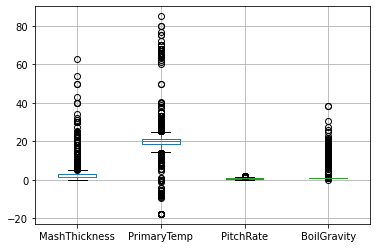

In [26]:
#Ver boxplots(para ver os outliers) e histogramas(para ver se e melhor substituir pela media ou por medianas).
selecaoAtualizada.boxplot(column=['MashThickness', 'PrimaryTemp', 'PitchRate', 'BoilGravity'])
plt.show()
#PitchRate contem menos outliers.

array([[<AxesSubplot:title={'center':'MashThickness'}>,
        <AxesSubplot:title={'center':'PrimaryTemp'}>],
       [<AxesSubplot:title={'center':'PitchRate'}>,
        <AxesSubplot:title={'center':'BoilGravity'}>]], dtype=object)

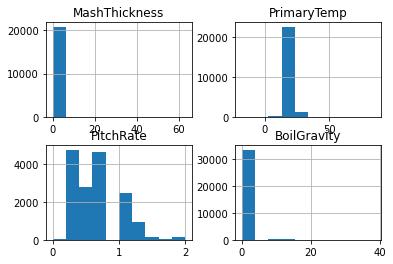

In [27]:
selecaoAtualizada.hist(column=['MashThickness', 'PrimaryTemp', 'PitchRate', 'BoilGravity'])

In [28]:
#Metodo 1: substituindo as 3 variaveis crestantes comd ados missing pela mediana:
selecaoAtualizada['MashThickness'].fillna(selecaoAtualizada['MashThickness'].median(), inplace=True)
selecaoAtualizada['BoilGravity'].fillna(selecaoAtualizada['BoilGravity'].median(), inplace=True)
selecaoAtualizada['PrimaryTemp'].fillna(selecaoAtualizada['PrimaryTemp'].median(), inplace=True)

#Metodo 2: consistiria em exluir as 2 variaveis restantes com dado missing dos dados de treino e teste (nao do dataset!) e substituindo a com menos dados missing pela mediana:
* x_treino2.drop('MashThickness', axis=1, inplace=True)
* y_treino2.drop('PrimaryTemp', axis=1, inplace=True)
* x_teste2.drop('MashThickness', axis=1, inplace=True)
* y_novo.drop('PrimaryTemp', axis=1, inplace=True)
* selecao['BoilGravity'].fillna(selecaoAtualizada['BoilGravity'].median(), inplace=True)

In [30]:
#Criando bases de treino e teste para transformar variavel em target e considerando apenas dados que nao sao nulos da target:
x_treino2 = selecaoAtualizada[selecaoAtualizada['PitchRate'].notnull()]   #criando preditoras apenas considerandod ados nao nulos 
x_treino2.drop('PitchRate', axis=1, inplace=True)   
y_treino2 = selecaoAtualizada[selecaoAtualizada['PitchRate'].notnull()]['PitchRate'] #criando target

#Criando variaveis 'teste' onde serao jogados os dados nulos e testados pelo modelo de regressao:
x_teste2 = selecaoAtualizada[selecaoAtualizada['PitchRate'].isnull()]      #teste para modelo de regressao
y_novo = selecaoAtualizada[selecaoAtualizada['PitchRate'].isnull()]['PitchRate']  #variavel que recebera os novos valores
x_teste2.drop('PitchRate', axis=1, inplace=True)  

In [31]:
#Aplicando modelo de regressao nos dados missing:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
treeRegr = DecisionTreeRegressor() #Instanciando modelo

treeRegr.fit(x_treino2, y_treino2) #Aplicando modelo nos dados de treino

y_novo = treeRegr.predict(x_teste2)  #Prevendo valores de 'teste'

In [34]:
selecaoAtualizada.PitchRate[selecaoAtualizada.PitchRate.isnull()] = y_novo
#printando resultado na variavel y_novo: variavel que armazena novo valores previstos dos dados missing e treinados em x_teste2.

<b>VISUALIZANDO RESULTADO DE DADOS MISSING SUBSTITUIDOS POR DADOS PREVISTOS POR MODELO DE REGRESSAO NA VARIAVEL TARGET('PITCH RATE')

In [36]:
selecaoAtualizada.head()

,All Grain,BIAB,Partial Mash,extract,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,PitchRate,PrimaryTemp
2,0,0,0,1,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,1.5,0,0.35,20.00
3,1,0,0,0,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,1.5,0,0.35,20.00
5,1,0,0,0,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,1.5,0,1.00,20.00
6,1,0,0,0,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,1.047,75.0,1.5,0,0.75,20.00
9,1,0,0,0,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,1.5,0,0.50,21.11


In [37]:
selecaoAtualizada.isnull().sum()

All Grain        0
BIAB             0
Partial Mash     0
extract          0
StyleID          0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
MashThickness    0
SugarScale       0
PitchRate        0
PrimaryTemp      0
dtype: int64

In [35]:
#Criando copia do dataset pre-processado:
selecaoAtualizada.to_csv('Beerdataset_ready.csv')

<b>MACHINE LEARNING: Bibliotecas, variaveis target/preditora, modelos<b>

In [36]:
#Importando bibliotecas necessarias:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [37]:
#Criando variaveis preditoras/target:
y = selecaoAtualizada['StyleID']
x = selecaoAtualizada.drop('StyleID', axis=1)

In [38]:
def models(a, b):
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedKFold
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    skfold = StratifiedKFold(n_splits=3)
    x = a
    y = b
    
    normalizador = MinMaxScaler(feature_range=(0,1))
    x_norm = normalizador.fit_transform(x)
    
    logist = LogisticRegression()
    naive = GaussianNB()
    dtree = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    
    resulLogist = cross_val_score(logist, x, y, cv = skfold)
    resulNaive = cross_val_score(naive, x, y, cv = skfold)
    resulDtree = cross_val_score(dtree, x, y, cv = skfold)
    resulKnn = cross_val_score(knn, x, y, cv = skfold)
    
    dicios = {'R_logis': resulLogist.mean(), 'R_Naive': resulNaive.mean(), 
              'R_Dtree': resulDtree.mean(), 'R_Knn': resulKnn.mean()}
    best_model = max(dicios, key=dicios.get)
    
    print('Regressao Logistica:', resulLogist.mean(), 'Naive Bayes:', resulNaive.mean(), 
          'Decision Tree:', resulDtree.mean(), 'KNN:', resulKnn.mean())
    print('Melhor Modelo:', best_model)
    print('Score do Melhor Modelo:', dicios[best_model])
    

In [39]:
models(x,y)

C:\Users\sylvi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sylvi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Regressao Logistica: 0.4469286359530262 Naive Bayes: 0.4171465672990063 Decision Tree: 0.4718552393857272 KNN: 0.5079889340560072
Melhor Modelo: R_Knn
Score do Melhor Modelo: 0.5079889340560072


<b> FIM DA ANALISEE COMPARATIVA DE MODELOS DE REGRESSAO<b>

# TESTANDO OS DOIS MELHORES MODELOS ESPECIFICOS PARA O DATASET: KNN e DECISION TREE

<b>KNN: APLICACAO MODELO E AJUSTE DE PARAMETROS<b>

In [40]:
#Normalizando dados:
normalizadorKNN = MinMaxScaler(feature_range=(0,1))
x_normKNN = normalizadorKNN.fit_transform(x)

In [41]:
#Base de treino e teste:
x_teste, y_teste, x_treino, y_treino = train_test_split(x_normKNN, y, test_size=0.3, random_state = 14)

In [42]:
modeloKNN = KNeighborsClassifier()
modeloKNN.fit(x,y)
ResultadoKNN = modeloKNN.score(x ,y)
print('Resultado modelo KNN:', ResultadoKNN)

Resultado modelo KNN: 0.6442524841915086


In [43]:
#Ajuste de parametros e nova aplicacao KNN:
from sklearn.model_selection import GridSearchCV
import numpy as np

valores_K = np.array([3, 5, 7, 9, 11])
calculo_distancia = ['minkowski', 'chebyshev']
valores_p = np.array([1,2,3,4])   
valores_grid = {'n_neighbors': valores_K, 'metric': calculo_distancia, 'p': valores_p}
#inserindo ' minkowski' posso testar outras distancias tambem em valores.p1 = distancia euclidiana, p2 = distancia manhattan

In [ ]:
#Criando os grids:
gridKNN = GridSearchCV(estimator=modeloKNN, param_grid=valores_grid, cv=5)
gridKNN.fit(x_normKNN, y)

In [ ]:
#Imprimindo os melhores parametros:
print('Melhor acuracia:', gridKNN.best_score_)
print('Melhor K:', gridKNN.best_estimator_.n_neighbors)
print('Metodo distancia:', gridKNN.best_estimator_.metric)
print('Melhor valor de p:', gridKNN.best_estimator_.p )

<b>DECISION TREE: APLICACAO MODELO E AJUSTE DE PARAMETROS<b>

In [ ]:
#Aplicando modelo:
from sklearn.model_selection import StratifiedKFold
skfolddTree = StratifiedKFold(n_splits=5, random_state=10, shufle=True)
modeloDTree = DecisionTreeClassifier()
resultadoDTREE = cross_val_score(modeloDTree, x, y, cv = skfolddTree)
print('Resultados Decision Tree:', resultado DTREE)

In [ ]:
#Ajustando parametros e aplicando modelo novamente:

#Valores parametros:
num_splitsTree = np.array([2,3,4,5,6,7,8,9])
max_nivelTree = np.array([3,4,5,6,])
algoritmo = ['gini', 'entropy']
valores_gridDtree = {'min_samples_split': num_splitsTree, 'max_depth': max_nivelTree, 'criterion': algoritmo}

gridTree = GridSearchCV(estimator=modeloDTree, param_grid=valores_gridDTree, cv=5)
gridTree.fit(x,y)

print('Melhor Resultado:', gridTree.best_score_)
print('Menor Split:', gridTree.best_estimator_.min_samples_split)
print('Maior Profundidade:', gridTree.best_estimator_.max_depth)
print('Algoritmo Recomendado:', gridTree.best_estimator_.criterion)